# Linear Regression with Python: A Machine Learning Approach

## Script Content
#### 1. Importing Libraries and Dataset
#### 2. Data Cleaning
#### 3. Preparing Data for Regression
#### 4. Regression Analysis

### 1. Importing Libraries & Dataset

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Define path

path = r'/Users/tanu/Desktop/Data Analytics/Achievement 6/Data'

In [6]:
# Importing Dataset

df = pd.read_csv(os.path.join(path,'Prepared data','Global_Cybersecurity_Treats.csv'))

In [7]:
df.shape

(3000, 11)

## 2. Data Cleaning
#### - No Missing Value
#### - No Duplicates
#### - No Mixed type Data
#### - dropped unnecessary data

In [9]:
df.head()

,Unnamed: 0,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [10]:
# Dropping Unnamed column

df = df.drop('Unnamed: 0', axis =1)

In [11]:
# Checking for missisng values

df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

## 3. Data Preparation for Regression

In [21]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


### Checking for extreme values
####  Financial Loss (in Millions $) - None

Text(0.5, 1.0, 'Financial Loss (in Million $)')

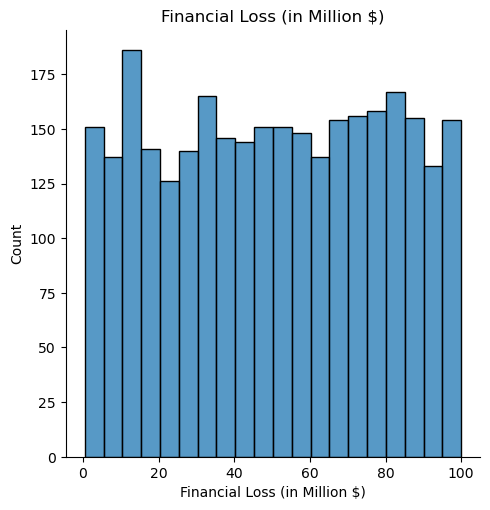

In [24]:
sns.displot(df['Financial Loss (in Million $)'], bins=20)
plt.title('Financial Loss (in Million $)')

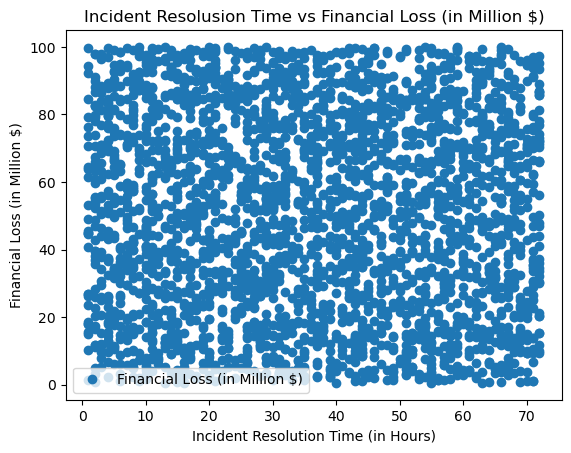

In [27]:
# Visualizing Variables for potential analysis with scatterplot

df.plot(x = 'Incident Resolution Time (in Hours)', y='Financial Loss (in Million $)',style='o') 
plt.title('Incident Resolusion Time vs Financial Loss (in Million $)')  
plt.xlabel('Incident Resolution Time (in Hours)')  
plt.ylabel('Financial Loss (in Million $)')  
plt.show()

#### Hypothesis: The longer it takes to resolve an incident, the greater the resulting financial loss.

## 4. Regression Analysis

In [30]:
# Convert the variables into arrays and put them into separate objects

X = df['Incident Resolution Time (in Hours)'].values.reshape(-1,1)
y = df['Financial Loss (in Million $)'].values.reshape(-1,1)

In [32]:
# split the data into training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
# Create a regression object

regression = LinearRegression()

In [36]:
# Fit the regression model onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

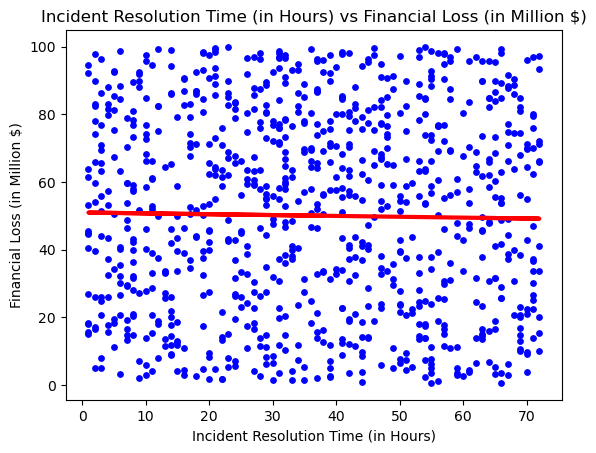

In [41]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Incident Resolution Time (in Hours) vs Financial Loss (in Million $)')
plot_test.xlabel('Incident Resolution Time (in Hours)')
plot_test.ylabel('Financial Loss (in Million $)')
plot_test.show()

### Observation:
#### 1. The data points are widely scattered without any obvious trend or pattern.
#### 2. The red line (likely a regression line) appears nearly flat, suggesting that financial loss does not significantly increase or decrease with incident resolution time.
#### 3. Since there's no strong relationship between resolution time and financial loss, focusing solely on reducing resolution time may not significantly reduce financial loss.

In [44]:
# Model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [46]:
# Print the modle summary statistics

print('Slope:' , regression.coef_)
print('Mean squared errror:', rmse)
print('R2 score:' , r2)

Slope: [[-0.0252364]]
Mean squared errror: 862.2996448886842
R2 score: -0.002933656360706971


### Observation:
#### Slope = -0.025: A very small negative slope, meaning financial loss decreases slightly with longer resolution time—but the effect is negligible.
#### Mean Squared Error (MSE) = 862.3: High error, indicating poor prediction accuracy.
#### R² Score = -0.003: A negative R² suggests the model performs worse than simply predicting the mean of financial losses.

In [51]:
# Create a dataframe comparing the actual and predicted values of y.
data_1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_1.head(20)

,Actual,Predicted
0,89.77,49.373868
1,88.47,49.272923
2,57.90,50.257142
3,36.09,50.156197
4,58.91,49.575759
5,48.71,49.298159
6,87.62,50.282379
7,7.31,49.676705
8,85.76,50.282379
9,16.60,50.913289


#### The model is not capturing any meaningful relationship, it just predicts a near-average value for all inputs, making it ineffective for financial loss prediction.

## How Regression fits the training set

In [55]:
# Predict 

y_predicted_train = regression.predict(X_train)

In [57]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [59]:
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[-0.0252364]]
Mean squared error: 814.3891508474269
R2 score: 0.00032950027978040364


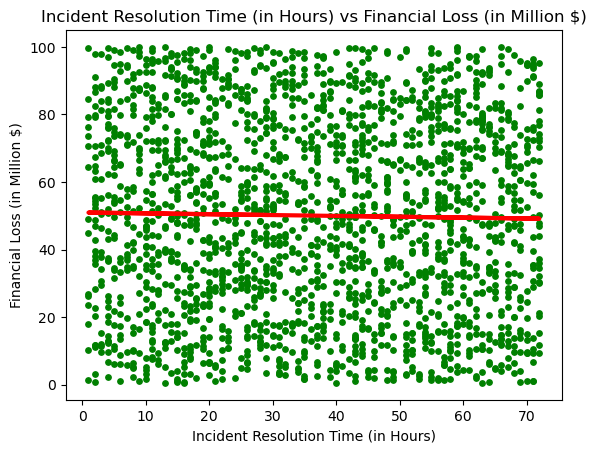

In [61]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color = 'green', s=15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plot_test.title('Incident Resolution Time (in Hours) vs Financial Loss (in Million $)')
plot_test.xlabel('Incident Resolution Time (in Hours)')
plot_test.ylabel('Financial Loss (in Million $)')
plot_test.show()

### Observation
#### The plot for both the sets, test set and train set, showed the same pattern: predictions clustered around the mean, with poor fit to actual values.
#### In both training and test sets:
#### The regression line is nearly horizontal.
#### Actual values vary greatly for any given resolution time.
#### R² is near zero in both cases, confirming poor generalization.
### Conclusion:
#### The data shows no significant correlation between incident resolution time and financial loss.Hence we can reject our hypothesis and can start looking for more meaninful relationship in other variables and should other non-linear relationships.